In [155]:
##DATA SCRAPING DE PRECIOS Y NOMBRES PRODUCTOS DE DECORACION LIDL

##PRUEBA DE DATA SCRAP. 
import requests
from bs4 import BeautifulSoup
import numpy as np
# URL de la página que deseas raspar
url = 'https://www.lidl.es/es/ver-todo-decoracion/c6279'

# Realizar la solicitud HTTP a la página
response = requests.get(url)

# Parsear el contenido HTML usando Beautiful Soup
soup = BeautifulSoup(response.content, 'html.parser')

# Encontrar todos los elementos que contienen los títulos de las noticias

##target_div = soup.find('div', class_='bookings2 b2 searchresults es lang_is_ltr header_reshuffle no_bg_img nobg user_center app_user_center sb_gradient_border b-sprite-3 ds-traveller-header lx_cwv_font_swap bigblue_std_sm bigblue_std_lg  system-font iq-x-bar iq-x-bar-new')
target_div = soup.find_all('div',class_='plp-product-grid-box-tile__title')
##target_div = soup.find_all('div', attrs={'data-testid':'title'})

# Verificar si se encontró el elemento y mostrar su contenido
# Iterar a través de la lista e imprimir los textos de los títulos
for div_element in target_div:
    strong_element = div_element.find('strong')  # Buscar el elemento <strong> dentro del <div>
    if strong_element:
        title_text = strong_element.get_text()  # Obtener el texto del elemento <strong>
        print(title_text)
    else:
        print("No se encontró un elemento <strong> dentro del <div>.")

Estor plisado 100 x 130 cm
Estor plisado 80 x 130 cm
Estor plisado 60 x 130 cm
Alfombra de baño 60x100 cm
Reloj retro de pared
Alfombra de algodón 120 x 180 cm
Espejo de pared gancho redondo
Espejo de pared
Alfombra de algodón 80 x 150 cm
Estor enrollable térmico para ventanas
Alfombra de algodón
Mebus® Reloj de pared
Planta artificial
Easymaxx Reloj de pared
Perchero
Reloj de pared infantil
Perchero
Alfombra de pelo corto 67 X 140 cm
Felpudo 40 x 60 cm
Posidonia artificial
Juego de cortinas
Alfombra 75 x 150 cm
Despertador radiocontrolado analógico
Marco de fotos collage en forma de corazón
Marco de fotos collage
Marco de fotos collage Memories
Marco de fotos collage Family
Alfombra de pelo sintético 60 x 90 cm
Reloj de pared con termómetro e higrómetro
Colgador para puerta 45 mm
Alfombra de exteriores
Alfombra
Alfombra de baño 50 x 80 cm
Felpudo 67 x 120 cm
Mascota de peluche
Reloj LED de pared y de sobremesa


In [58]:

from bs4 import BeautifulSoup

# URL de la página que deseas raspar
url = 'https://www.lidl.es/es/ver-todo-decoracion/c6279?ccurrentPage=1&pageSize=132'

# Realizar la solicitud HTTP a la página
response = requests.get(url)

# Parsear el contenido HTML usando Beautiful Soup
soup = BeautifulSoup(response.content, 'html.parser')

# Encontrar todos los elementos

title_elements = soup.find_all('div',class_='plp-product-grid-box-tile__title')
price_elements = soup.find_all('div', class_='plp-product-grid-box-tile__price')
name_price_pairs = []
# Verificar si se encontró el elemento y mostrar su contenido




for i in range(len(title_elements)):
    name = title_elements[i].find('strong').get_text().strip()
    price = price_elements[i].find('b').get_text().strip()
    name_price_pairs.append((name, price))



# Iterar a través de la lista e imprimir los textos de los títulos
print(name_price_pairs)

[('Estor plisado 100 x 130 cm', '9.99*'), ('Estor plisado 80 x 130 cm', '9.99*'), ('Estor plisado 60 x 130 cm', '9.99*'), ('Alfombra de baño 60x100 cm', '9.99*'), ('Reloj retro de pared', '7.99*'), ('Alfombra de algodón 120 x 180 cm', '24.99*'), ('Espejo de pared gancho redondo', '19.99*'), ('Espejo de pared', '19.99*'), ('Alfombra de algodón 80 x 150 cm', '19.99*'), ('Estor enrollable térmico para ventanas', '12.99*'), ('Alfombra de algodón', '19.99*'), ('Mebus® Reloj de pared', 'Precio recomendado'), ('Planta artificial', '12.99*'), ('Easymaxx Reloj de pared', 'Precio recomendado'), ('Perchero', '9.99*'), ('Reloj de pared infantil', '6.99*'), ('Perchero', '17.99*'), ('Alfombra de pelo corto 67 X 140 cm', '9.99*'), ('Felpudo 40 x 60 cm', '3.99*'), ('Posidonia artificial', '29.99*'), ('Juego de cortinas', '14.99*'), ('Alfombra 75 x 150 cm', '12.99*'), ('Despertador radiocontrolado analógico', '11.99*'), ('Marco de fotos collage en forma de corazón', '9.99*'), ('Marco de fotos collage',

In [161]:
##Making a Dataframe
import pandas as pd

data =  name_price_pairs

df = pd.DataFrame(data)

df.columns = ['Products', 'Price']

df

,Products,Price
0,Estor plisado 100 x 130 cm,9.99*
1,Estor plisado 80 x 130 cm,9.99*
2,Estor plisado 60 x 130 cm,9.99*
3,Alfombra de baño 60x100 cm,9.99*
4,Reloj retro de pared,7.99*
...,...,...
58,Juego de cortinas 135 x 265 cm pack 2,22.99*
59,Living Walls Panel autoadhesivo para pared,Precio recomendado
60,Wenko® Guardarropa telescópico 2 rieles,Precio recomendado
61,Perchas pack 3,6.99*


In [163]:
tipos_de_datos = df.dtypes
print(tipos_de_datos)

Products    object
Price       object
dtype: object


In [60]:
#clean dataset

df['Price'] = df['Price'].str.replace('*', '', regex=False)
df

,Products,Price
0,Estor plisado 100 x 130 cm,9.99
1,Estor plisado 80 x 130 cm,9.99
2,Estor plisado 60 x 130 cm,9.99
3,Alfombra de baño 60x100 cm,9.99
4,Reloj retro de pared,7.99
...,...,...
58,Juego de cortinas 135 x 265 cm pack 2,22.99
59,Living Walls Panel autoadhesivo para pared,Precio recomendado
60,Wenko® Guardarropa telescópico 2 rieles,Precio recomendado
61,Perchas pack 3,6.99


In [61]:
df

,Products,Price
0,Estor plisado 100 x 130 cm,9.99
1,Estor plisado 80 x 130 cm,9.99
2,Estor plisado 60 x 130 cm,9.99
3,Alfombra de baño 60x100 cm,9.99
4,Reloj retro de pared,7.99
...,...,...
58,Juego de cortinas 135 x 265 cm pack 2,22.99
59,Living Walls Panel autoadhesivo para pared,Precio recomendado
60,Wenko® Guardarropa telescópico 2 rieles,Precio recomendado
61,Perchas pack 3,6.99


In [64]:
#Elementos sin precio.

df_drop = df.loc[df['Price'] == 'Precio recomendado']
df_drop

,Products,Price
11,Mebus® Reloj de pared,Precio recomendado
13,Easymaxx Reloj de pared,Precio recomendado
53,"Ledvance Estante iluminado 6,5 W",Precio recomendado
54,Easymaxx Felpudo antirobos,Precio recomendado
59,Living Walls Panel autoadhesivo para pared,Precio recomendado
60,Wenko® Guardarropa telescópico 2 rieles,Precio recomendado


In [158]:
import re
# URL de la página web que deseas raspar (reemplaza esto con la URL real)
url = 'https://www.lidl.es/es/ver-todo-decoracion/c6279?ccurrentPage=1&pageSize=132'  

# Realizar la solicitud HTTP a la página
response = requests.get(url)

# Parsear el contenido HTML usando Beautiful Soup
soup = BeautifulSoup(response.content, 'html.parser')

##################################
##poductos con valores %
filtro = df['Price'].str.contains('%')

# Mostrar las filas que cumplen con el filtro
resultados = final_df[filtro]
#print(resultados)
a =resultados['Products'].values
#print(a)





# Nombre del producto que deseas buscar
b= df_drop['Products'].values

product_name_missing = np.append(a,b)


#print(product_name_missing)


###########################################################
# Encontrar todos los elementos con clase "product"
product_elements_missing = soup.find_all('div', class_='plp-product-grid-box-tile__title')
product_price_missing = soup.find_all('div', class_='plp-product-grid-box-tile__price' )

product_elements_missing_name=[]

for i in range(len(product_elements_missing)):
    name_m2 = product_elements_missing[i].find('strong').get_text().strip()
    price_m2 = product_price_missing[i].find('span').get_text().strip()
    for a in product_name_missing:
        if name_m2 == a:
            ##correccion del formato 
            indice = len(price_m2) - 1
            substring = ""

            # Recorrer la cadena desde el final hasta encontrar un espacio
            while indice >= 0 and price_m2[indice] != ' ':
                substring = price_m2[indice] + substring
                indice -= 1
        
            product_elements_missing_name.append((name_m2,substring))


print(product_elements_missing_name)


[('Mebus® Reloj de pared', '12.99*'), ('Easymaxx Reloj de pared', '11.99*'), ('Alfombra de baño 50 x 80 cm', '6.99*'), ('Reloj de pared para montar', '9.99*'), ('Estor plisado 80 x 200 cm', '9.49*'), ('Ledvance Estante iluminado 6,5 W', '32.99*'), ('Easymaxx Felpudo antirobos', '19.99*'), ('Puf infantil', '15.99*'), ('Fuente de interior con iluminación LED', '21.99*'), ('Living Walls Panel autoadhesivo para pared', '16.99*'), ('Wenko® Guardarropa telescópico 2 rieles', '34.99*'), ('Estor plisado térmico 49,4 x 75-118 cm', '19.99*')]


In [159]:
data2 =  product_elements_missing_name

df_2 = pd.DataFrame(data2)

df_2.columns = ['Products', 'Price']
df_2['Price'] = df_2['Price'].str.replace('*', '', regex=False)
df_2

,Products,Price
0,Mebus® Reloj de pared,12.99
1,Easymaxx Reloj de pared,11.99
2,Alfombra de baño 50 x 80 cm,6.99
3,Reloj de pared para montar,9.99
4,Estor plisado 80 x 200 cm,9.49
5,"Ledvance Estante iluminado 6,5 W",32.99
6,Easymaxx Felpudo antirobos,19.99
7,Puf infantil,15.99
8,Fuente de interior con iluminación LED,21.99
9,Living Walls Panel autoadhesivo para pared,16.99


In [160]:
#reemplazar datos faltantes.

final_df = df.merge(df_2, on='Products', how='outer', suffixes=('_df1', '_df2'))
final_df['Price'] = final_df['Price_df2'].combine_first(final_df['Price_df1'])

# Eliminar columnas adicionales
final_df = final_df.drop(['Price_df1', 'Price_df2'], axis=1)

final_df

,Products,Price
0,Estor plisado 100 x 130 cm,9.99
1,Estor plisado 80 x 130 cm,9.99
2,Estor plisado 80 x 130 cm,11.99
3,Estor plisado 60 x 130 cm,9.99
4,Alfombra de baño 60x100 cm,9.99
...,...,...
58,Juego de cortinas 135 x 265 cm pack 2,22.99
59,Living Walls Panel autoadhesivo para pared,16.99
60,Wenko® Guardarropa telescópico 2 rieles,34.99
61,Perchas pack 3,6.99


In [164]:
#verificando datos y tipos
tipos_de_datos = final_df.dtypes
print(tipos_de_datos)

Products    object
Price       object
dtype: object


In [170]:
final_df['Products'] = final_df['Products'].apply(str)
#final_df['Price'] = final_df['Price'].str.replace(r'[^\d.]', '', regex=True).astype(float)


In [171]:
#verificando datos y tipos, datos nulos o 0
tipos_de_datos = final_df.dtypes
print(tipos_de_datos)

Products     object
Price       float64
dtype: object


In [181]:
final_df.isnull().sum()

Products    0
Price       0
dtype: int64

In [223]:
final_df.isna().sum()

Products    0
Price       0
dtype: int64

In [224]:
#PODEMOS USAR ELDATAFRAME COMO DESEEMOS

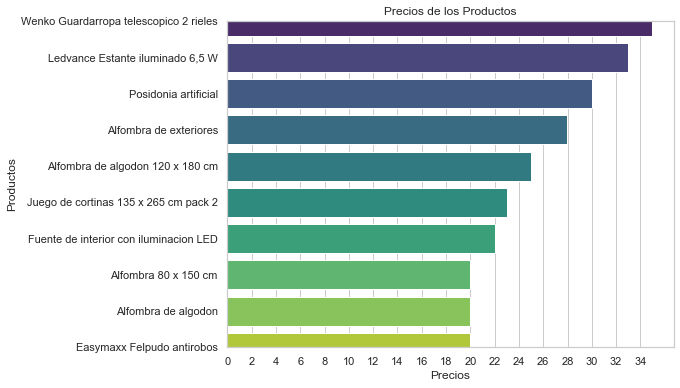

In [234]:
df_sorted = final_df.sort_values(by='Price', ascending=False)


#si queremos cambiar caracteres especiales
from unidecode import unidecode

replace = {'®':'', 'ñ': 'n', '': ''}
df_sorted['Products'] = df_sorted['Products'].replace(replace, regex=True)
df_sorted['Products'] = df_sorted['Products'].str.replace('|'.join(map(re.escape, replace.keys())),lambda m: replace[m.group()], regex=True)
df_sorted['Products'] = df_sorted['Products'].apply(unidecode)


# Seleccionar todos los productos (no solo los 10 más costosos)
productos = df_sorted.head(10)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la tabla utilizando Seaborn
plt.figure(figsize=(8, 6))
tabla = sns.barplot(x='Price', y='Products', data=productos, palette='viridis')


# Configurar título y etiquetas
plt.title('Precios de los Productos')
plt.xlabel('Precios')
plt.ylabel('Productos')

# Ajustar valores y divisiones en los ejes
plt.xticks(range(0, int(productos['Price'].max()) + 2, 2))
plt.yticks(range(len(productos)))

# Mostrar la tabla
plt.show()

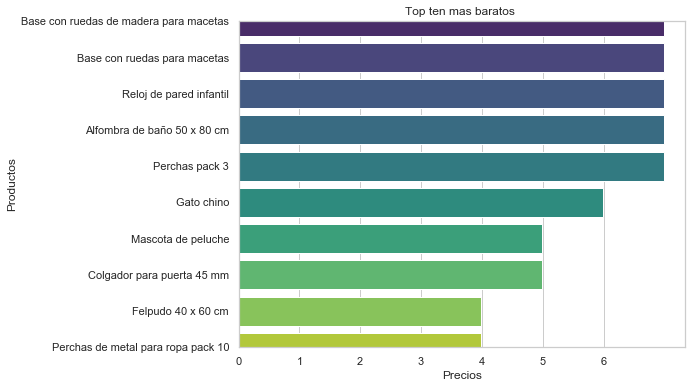

In [235]:
df_sorted = final_df.sort_values(by='Price', ascending=False)

# Seleccionar todos los productos (no solo los 10 más costosos)
productos = df_sorted.tail(10)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la tabla utilizando Seaborn
plt.figure(figsize=(8, 6))
tabla = sns.barplot(x='Price', y='Products', data=productos, palette='viridis')


# Configurar título y etiquetas
plt.title('Top ten mas baratos ')
plt.xlabel('Precios')
plt.ylabel('Productos')

# Ajustar valores y divisiones en los ejes
plt.xticks(range(0, int(productos['Price'].max()) + 1, 1))
plt.yticks(range(len(productos)))

# Mostrar la tabla
plt.show()

In [236]:
df_sorted




,Products,Price
60,Wenko® Guardarropa telescópico 2 rieles,34.99
53,"Ledvance Estante iluminado 6,5 W",32.99
20,Posidonia artificial,29.99
31,Alfombra de exteriores,27.99
6,Alfombra de algodón 120 x 180 cm,24.99
...,...,...
48,Gato chino,5.99
35,Mascota de peluche,4.99
30,Colgador para puerta 45 mm,4.99
19,Felpudo 40 x 60 cm,3.99


In [238]:
#exportacion de datos en csv 


# Exportar el DataFrame a un archivo CSV
df_sorted.to_csv('data_prod_deco.csv', index=False)  # El parámetro index=False evita guardar el índice del DataFrame como columna

print("DataFrame exportado exitosamente a archivo CSV.")

DataFrame exportado exitosamente a archivo CSV.
